# Lab 1: Logistic Regression

## Lab Instruction 

In this lab, you are to create a logistic regression model to predict the sale price of <br>
houses (Low, High) from a given set of attributes. <br>
The data file is`lab1_dataset.csv` <br>
Note that you need to explore and process/drop attributes, <br>
and map numerical values of sale prices to categorical values (Low, High)

###  1. Import the Dataset and Learn About the Data


In [1]:
import pandas as pd
import numpy as np
trainData = pd.read_csv('lab1_dataset.csv') #read data
trainData.head() 

,Id,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,...,BsmtFinType1,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,Fence,SalePrice
0,1,PConc,856,Gd,0,Ex,2,Gd,61,2003.0,...,GLQ,2003,548,8,2,1710,2003,65.0,NaN,208500
1,2,CBlock,1262,TA,1,Ex,2,Gd,0,1976.0,...,ALQ,1976,460,6,2,1262,1976,80.0,NaN,181500
2,3,PConc,920,Gd,1,Ex,2,Gd,42,2001.0,...,GLQ,2001,608,6,2,1786,2002,68.0,NaN,223500
3,4,BrkTil,961,Gd,1,Gd,1,TA,35,1998.0,...,ALQ,1915,642,7,3,1717,1970,60.0,NaN,140000
4,5,PConc,1145,Gd,1,Ex,2,Gd,84,2000.0,...,GLQ,2000,836,9,3,2198,2000,84.0,NaN,250000


###  2. Preprocessing

Use techniques that you have learned to preprocess the data. For example, 
-  Remove non-informative features
-  Remove features with too many NA
-  Remove rows with incomplete data
-  Remove features with highly unbalanced labels
-  Encode categorical variables as appropriate

In [2]:
trainData.info() #see info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
Id              1460 non-null int64
Foundation      1460 non-null object
1stFlrSF        1460 non-null int64
KitchenQual     1460 non-null object
Fireplaces      1460 non-null int64
HeatingQC       1460 non-null object
FullBath        1460 non-null int64
BsmtQual        1423 non-null object
OpenPorchSF     1460 non-null int64
GarageYrBlt     1379 non-null float64
ExterQual       1460 non-null object
OverallQual     1460 non-null int64
BsmtFinType1    1423 non-null object
YearBuilt       1460 non-null int64
GarageArea      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
GrLivArea       1460 non-null int64
YearRemodAdd    1460 non-null int64
LotFrontage     1201 non-null float64
Fence           281 non-null object
SalePrice       1460 non-null int64
dtypes: float64(2), int64(13), object(7)
memory usage: 251.0+ KB


In [3]:
trainData.select_dtypes(['object','bool']).describe() 

,Foundation,KitchenQual,HeatingQC,BsmtQual,ExterQual,BsmtFinType1,Fence
count,1460,1460,1460,1423,1460,1423,281
unique,6,4,5,4,4,6,4
top,PConc,TA,Ex,TA,TA,Unf,MnPrv
freq,647,735,741,649,906,430,157


In [4]:
trainData.describe()

,Id,1stFlrSF,Fireplaces,FullBath,OpenPorchSF,GarageYrBlt,OverallQual,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000
mean,730.500000,1162.626712,0.613014,1.565068,46.660274,1978.506164,6.099315,1971.267808,472.980137,6.517808,1.767123,1515.463699,1984.865753,70.049958,180921.195890
std,421.610009,386.587738,0.644666,0.550916,66.256028,24.689725,1.382997,30.202904,213.804841,1.625393,0.747315,525.480383,20.645407,24.284752,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1900.000000,1.000000,1872.000000,0.000000,2.000000,0.000000,334.000000,1950.000000,21.000000,34900.000000
25%,365.750000,882.000000,0.000000,1.000000,0.000000,1961.000000,5.000000,1954.000000,334.500000,5.000000,1.000000,1129.500000,1967.000000,59.000000,129975.000000
50%,730.500000,1087.000000,1.000000,2.000000,25.000000,1980.000000,6.000000,1973.000000,480.000000,6.000000,2.000000,1464.000000,1994.000000,69.000000,163000.000000
75%,1095.250000,1391.250000,1.000000,2.000000,68.000000,2002.000000,7.000000,2000.000000,576.000000,7.000000,2.000000,1776.750000,2004.000000,80.000000,214000.000000
max,1460.000000,4692.000000,3.000000,3.000000,547.000000,2010.000000,10.000000,2010.000000,1418.000000,14.000000,4.000000,5642.000000,2010.000000,313.000000,755000.000000


In [5]:
trainData2 = trainData.drop(['Id','Fence','GarageYrBlt','YearRemodAdd','YearBuilt'],axis=1)
trainData2.head()

,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,ExterQual,OverallQual,BsmtFinType1,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,LotFrontage,SalePrice
0,PConc,856,Gd,0,Ex,2,Gd,61,Gd,7,GLQ,548,8,2,1710,65.0,208500
1,CBlock,1262,TA,1,Ex,2,Gd,0,TA,6,ALQ,460,6,2,1262,80.0,181500
2,PConc,920,Gd,1,Ex,2,Gd,42,Gd,7,GLQ,608,6,2,1786,68.0,223500
3,BrkTil,961,Gd,1,Gd,1,TA,35,TA,7,ALQ,642,7,3,1717,60.0,140000
4,PConc,1145,Gd,1,Ex,2,Gd,84,Gd,8,GLQ,836,9,3,2198,84.0,250000


In [6]:
trainData2.select_dtypes(['object','bool']).describe()

,Foundation,KitchenQual,HeatingQC,BsmtQual,ExterQual,BsmtFinType1
count,1460,1460,1460,1423,1460,1423
unique,6,4,5,4,4,6
top,PConc,TA,Ex,TA,TA,Unf
freq,647,735,741,649,906,430


In [7]:
trainData2.isnull().sum() #check whatever there is null value in any labels

Foundation        0
1stFlrSF          0
KitchenQual       0
Fireplaces        0
HeatingQC         0
FullBath          0
BsmtQual         37
OpenPorchSF       0
ExterQual         0
OverallQual       0
BsmtFinType1     37
GarageArea        0
TotRmsAbvGrd      0
GarageCars        0
GrLivArea         0
LotFrontage     259
SalePrice         0
dtype: int64

In [8]:
trainData2 = trainData2.drop('LotFrontage',axis=1) #labels with 17% of incomplete data

In [9]:
trainData2.shape #check data features

(1460, 16)

In [10]:
trainData2=trainData2.dropna(how='any') #remove na and nan

In [11]:
trainData2.shape #check data features

(1423, 16)

In [12]:
#check all labels with object and boolean type

In [13]:
trainData2['Foundation'].value_counts() #balance

PConc     644
CBlock    625
BrkTil    145
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [14]:
trainData2['KitchenQual'].value_counts() #balance

TA    706
Gd    582
Ex    100
Fa     35
Name: KitchenQual, dtype: int64

In [15]:
trainData2['HeatingQC'].value_counts() #balance

Ex    734
TA    410
Gd    235
Fa     43
Po      1
Name: HeatingQC, dtype: int64

In [16]:
trainData['BsmtQual'].value_counts() #balance

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [17]:
trainData2['ExterQual'].value_counts() #balance

TA    872
Gd    487
Ex     52
Fa     12
Name: ExterQual, dtype: int64

In [18]:
trainData2['BsmtFinType1'].value_counts() #balance 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [19]:
#trainData2['Fireplaces'].value_counts() #balance

In [20]:
trainData2['FullBath'].value_counts() #balance

2    747
1    635
3     32
0      9
Name: FullBath, dtype: int64

In [21]:
trainData2['GarageCars'].value_counts() #balance 

2    802
1    361
3    181
0     74
4      5
Name: GarageCars, dtype: int64

In [22]:
trainData2['OverallQual'].value_counts() #balance  

5     382
6     373
7     318
8     168
4     103
9      43
10     18
3      14
2       3
1       1
Name: OverallQual, dtype: int64

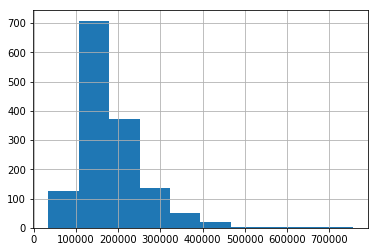

In [23]:
import matplotlib as plt
%matplotlib inline

trainData2.SalePrice.hist() #check the skewness of our data

In [24]:
medSale = np.median(trainData2.SalePrice) #use median to divide the data because our graph is a right-skewed
high = trainData2.SalePrice >= medSale #if current saleprice is greater than median, set to high
low = trainData2.SalePrice < medSale #if current saleprice is lower than median, set to low
trainData2.loc[high,'SalePrice'] = "High"
trainData2.loc[low,'SalePrice'] = "Low"

In [25]:
trainData2.head()

,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,ExterQual,OverallQual,BsmtFinType1,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,SalePrice
0,PConc,856,Gd,0,Ex,2,Gd,61,Gd,7,GLQ,548,8,2,1710,High
1,CBlock,1262,TA,1,Ex,2,Gd,0,TA,6,ALQ,460,6,2,1262,High
2,PConc,920,Gd,1,Ex,2,Gd,42,Gd,7,GLQ,608,6,2,1786,High
3,BrkTil,961,Gd,1,Gd,1,TA,35,TA,7,ALQ,642,7,3,1717,Low
4,PConc,1145,Gd,1,Ex,2,Gd,84,Gd,8,GLQ,836,9,3,2198,High


In [31]:
trainData3 = pd.get_dummies(trainData2, columns = ['Foundation','1stFlrSF','KitchenQual','BsmtFinType1','Fireplaces','HeatingQC','FullBath','BsmtQual','ExterQual'])
#convert string to number by using one-hot coding
trainData3.head()

,OpenPorchSF,OverallQual,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,SalePrice,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,...,FullBath_2,FullBath_3,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,61,7,548,8,2,1710,High,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,0,6,460,6,2,1262,High,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,42,7,608,6,2,1786,High,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,35,7,642,7,3,1717,Low,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,84,8,836,9,3,2198,High,0,0,1,...,1,0,0,0,1,0,0,0,1,0


### 3. Model Training 
We will use Scikit-learn package to build a model.
- http://scikit-learn.org/stable/

Model Evaluation Method
- Split into train set and test set

In [33]:
trainData_X = trainData3.drop('SalePrice',axis = 1) #remove the predictor
trainData_Y = trainData3.SalePrice #set the predictor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData_X, trainData_Y,
test_size = 0.4) #divide training and testing data by using hold-out method

- Fit Logistic Regression model

In [34]:
from sklearn import linear_model 
lr = linear_model.LogisticRegression() 
lr.fit(X_train,y_train) #train model using training data set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
yhat_train = lr.predict(X_train) #predict the our model using the training data

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_train, yhat_train, target_names =
['High','Low'])) #show the performance report of model using the training predictor

             precision    recall  f1-score   support

       High       0.93      0.94      0.93       442
        Low       0.93      0.93      0.93       411

avg / total       0.93      0.93      0.93       853



In [43]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train)) #show confusion matrix 

Confusion matrix for train dataset: 

[[414  28]
 [ 30 381]]


### 4. Model Tuning &  Result Analysis 

Analyze the model results. Do you think the model is good enough? <br>
Does it overfit or underfit the data? <br>
Explain and provide evidence to support your claims.


In [53]:
yhat_test = lr.predict(X_test) #predict the our model using the testing data
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test, target_names =
['High','Low'])) #show the performance report of model using the testing predictor

             precision    recall  f1-score   support

       High       0.89      0.91      0.90       272
        Low       0.91      0.90      0.91       298

avg / total       0.90      0.90      0.90       570



In [54]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for train dataset: \n")
print(confusion_matrix(y_test,yhat_test))  #show confusion matrix 

Confusion matrix for train dataset: 

[[247  25]
 [ 31 267]]


In [ ]:
'''Our Model is balanced. It is not overfitting because the value of the accuracy drops insignificantly 
when use the testing data. It is not underfitting because the value of the accuracy 
when using both training and test data is quite good'''

### 5. (Optional) Mutlinomial Logistic Regression Model

Binning the sale price into three classes : `Low`, `Medium`, `High`.
Then, apply the logistic regression model and evaluate the model performance. <br>
See http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html